In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Loading of Libraries

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



# Data Loading into a df

In [68]:
df = pd.read_csv('listings.csv')

# show some of the data

In [69]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40,NaN
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.10,2,0,0,NaN
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,NaN,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,NaN,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,27886,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,137,3,251,2023-05-01,1.81,1,0,20,NaN


#  Now we need to check how many rows and columns the dataset is having. It is also necessary to check how many unique values are present for each column. For this we will also use the nunique

In [70]:
print('\nRows : ',df.shape[0])
print('\nColumns :', df.shape[1])



Rows :  7608

Columns : 18


In [71]:
print('\nColumns:',df.columns)



Columns: Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


In [72]:
print(' \n Number of Unique value in each column :\n',df.nunique())

 
 Number of Unique value in each column :
 id                                7608
name                              3585
host_id                           6571
host_name                         3031
neighbourhood_group                  0
neighbourhood                       22
latitude                          5196
longitude                         6137
room_type                            4
price                              626
minimum_nights                      48
number_of_reviews                  478
last_review                        977
reviews_per_month                  637
calculated_host_listings_count      17
availability_365                   366
number_of_reviews_ltm              145
license                           5737
dtype: int64


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7608 non-null   int64  
 1   name                            7608 non-null   object 
 2   host_id                         7608 non-null   int64  
 3   host_name                       7608 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7608 non-null   object 
 6   latitude                        7608 non-null   float64
 7   longitude                       7608 non-null   float64
 8   room_type                       7608 non-null   object 
 9   price                           7608 non-null   int64  
 10  minimum_nights                  7608 non-null   int64  
 11  number_of_reviews               7608 non-null   int64  
 12  last_review                     68

DATA CLEANING

In [74]:
df_copy=df.copy()

### Attributes such as 'id', 'host_name', 'license',and 'last_review' do not contribute much to our data analysis and 'neighbourhood_group' is null so we can drop these columns.

In [75]:
df_copy.drop(['id', 'name','last_review','neighbourhood_group','license'],axis=1,inplace=True)

In [76]:
#Let us now check for missing values in the data set
df_copy.isnull().sum()

host_id                             0
host_name                           0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
reviews_per_month                 710
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
dtype: int64

In [78]:
# Replacing missing values in the reviews_per_month column
df_copy.fillna({'reviews_per_month':0}, inplace = True)

In [79]:
# Let us again check whether all the missing values have been removed or not
df_copy.isnull().sum()

host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [80]:
df_copy.duplicated().sum()

0

# there is no dublicated value in listings

In [81]:
df_copy.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,7.608000e+03,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000
mean,1.032177e+08,52.366725,4.889936,251.065589,4.914564,47.499211,1.061130,1.798896,79.586619,11.798896
std,1.393419e+08,0.017068,0.035059,263.170218,33.263777,106.402516,2.266514,2.590756,106.483001,33.469905
min,3.159000e+03,52.290340,4.755710,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9.937172e+06,52.355890,4.866060,148.000000,2.000000,3.000000,0.200000,1.000000,0.000000,0.000000
50%,3.501297e+07,52.365980,4.887770,202.000000,3.000000,11.000000,0.480000,1.000000,21.000000,3.000000
75%,1.402245e+08,52.376470,4.908300,300.000000,4.000000,40.000000,1.110000,1.000000,145.000000,9.000000
max,5.183111e+08,52.425120,5.026430,12000.000000,1001.000000,2720.000000,114.930000,22.000000,365.000000,1626.000000


In [82]:
df_copy.describe(include=['object'])

,host_name,neighbourhood,room_type
count,7608,7608,7608
unique,3031,22,4
top,Maarten,De Baarsjes - Oud-West,Entire home/apt
freq,39,1260,5783


# Linear correlation between the columns with each other

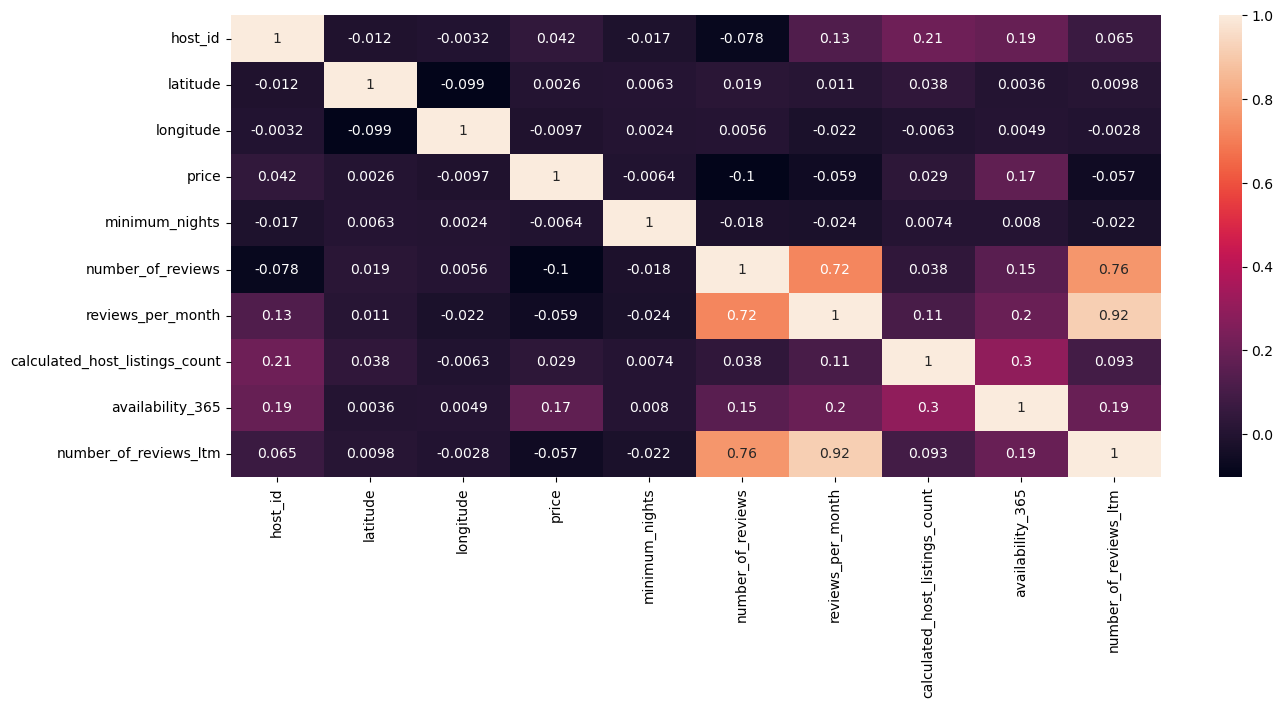

In [83]:
# Plotting the correlation matrix
plt.figure(figsize = (15,6))
sns.heatmap(df_copy.corr(), annot=True)
plt.show()

In [84]:
# Let us now take a look at the different neighborhood
df_copy['neighbourhood'].unique()

array(['Oostelijk Havengebied - Indische Buurt', 'Centrum-Oost',
       'De Pijp - Rivierenbuurt', 'Oud-Oost', 'Centrum-West',
       'De Baarsjes - Oud-West', 'Zuid', 'Bos en Lommer', 'Slotervaart',
       'Noord-Oost', 'Westerpark', 'Watergraafsmeer',
       'Buitenveldert - Zuidas', 'Oud-Noord', 'Bijlmer-Centrum',
       'IJburg - Zeeburgereiland', 'Noord-West',
       'Geuzenveld - Slotermeer', 'De Aker - Nieuw Sloten', 'Osdorp',
       'Gaasperdam - Driemond', 'Bijlmer-Oost'], dtype=object)

In [85]:
df_copy['neighbourhood'].nunique()

22

# So there are only 22 neighbourhood  in the data set.

# Count of properties available in each neighbourhood

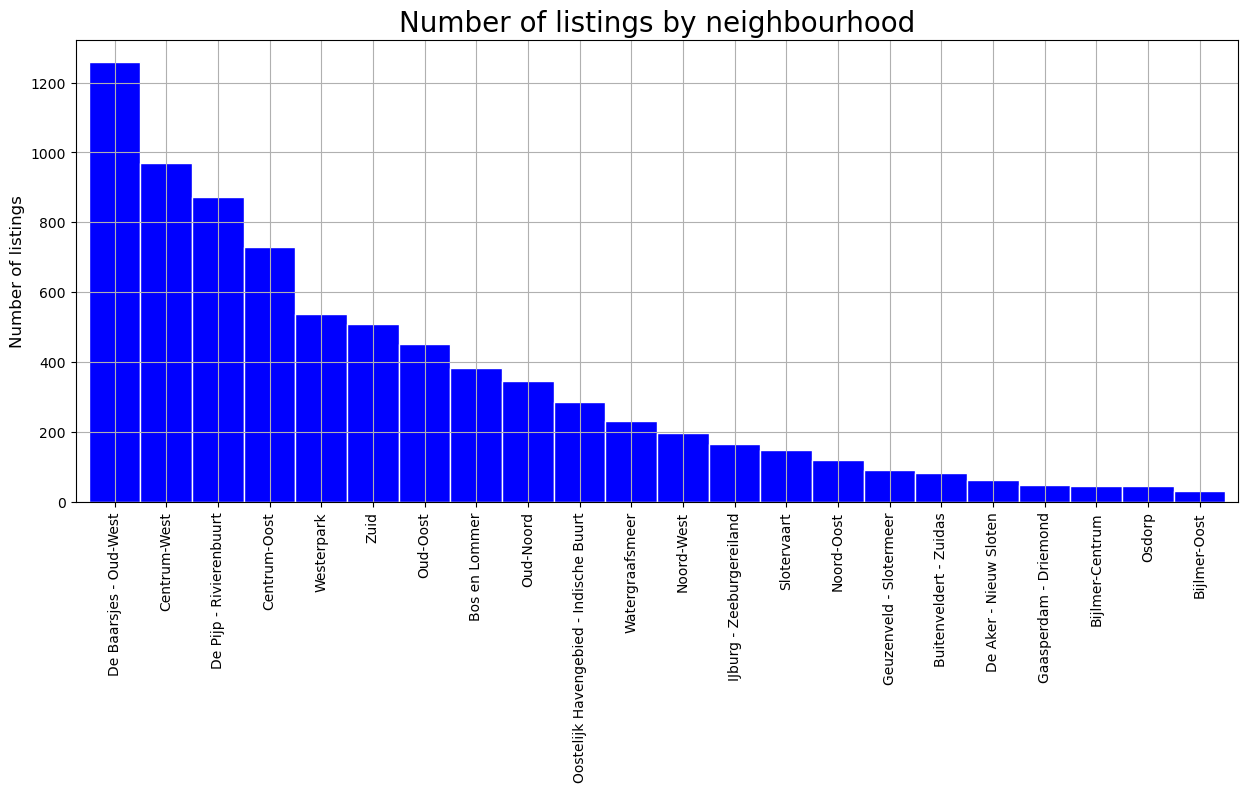

In [86]:
# Let us now take a look at how many properties are there in each neighbourhood 
feq=df['neighbourhood'].value_counts().sort_values(ascending=False)
feq.plot.bar(figsize=(15,6), color='b', width=1,edgecolor='white',grid=True)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.show()

### We can see here, that most of the properties fall in the De Baarsjes - Oud-West

In [87]:
# Let us now take a look at different room types being offered at the properties
df_copy['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

### There are only 4 categories for the room types, which are:Hotel room, Private Room- a single room, Entire home/apt: the entire house or apartment will be available for the visitors and they will be the only ones living there at that time, and Shared Room: the room can be shared with other visitors as well.

# Count of room types available in Airbnb properties

<AxesSubplot:xlabel='room_type', ylabel='count'>

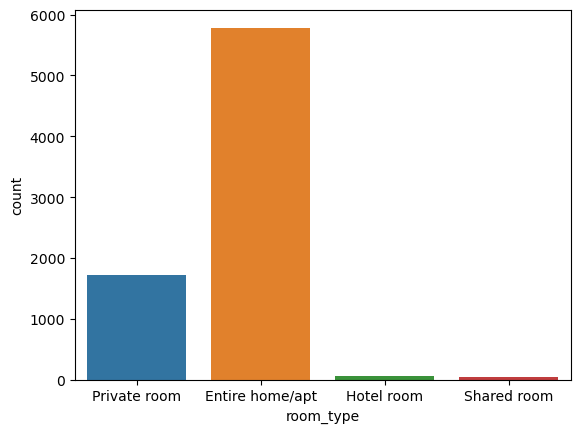

In [88]:
# Let us now look at what type of rooms do most properties offer
sns.countplot(x = 'room_type', data = df_copy) 

In [89]:
count = df['room_type'].value_counts()
fig = px.pie(df, values=count, names=count.index, title='Room Type')
fig.show()

### So most of the properties are offering either a Private room or the Entire home/apt, there are very few properties which are offering a Shared room. The reason for this can be that most of the tourists or visitors want privacy and prefer either a private room or to have the entire home/apt for themselves for their convenience.

In [90]:
# Let us now take a look at the price range of the properties
print("--- Price Per Night ---")
print("Minimum Price in $:", min(df_copy['price']))
print("Maximum Price in $:", max(df_copy['price']))
print("Average Price in $:", df_copy['price'].mean())

--- Price Per Night ---
Minimum Price in $: 0
Maximum Price in $: 12000
Average Price in $: 251.06558885383808


In [91]:
df.sort_values(by='price',ascending=False,inplace=True)

In [92]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
4173,43600284,Serviced apartment in Amsterdam · 1 bedroom · ...,93743075,Kelsey,NaN,Centrum-Oost,52.36331,4.89307,Private room,12000,1,0,NaN,NaN,2,365,0,036309580557ADA88EF3
461,2474754,Rental unit in Amsterdam · ★4.71 · 1 bedroom ·...,10428722,Yaap,NaN,Centrum-West,52.37914,4.88491,Entire home/apt,10000,5,24,2023-05-07,0.22,1,313,9,0363 5B55 3FD5 8759 2A0D
3912,39431135,Home in Amsterdam · ★4.89 · 3 bedrooms · 3 bed...,3884675,Devran,NaN,Centrum-West,52.38264,4.88572,Entire home/apt,7900,3,18,2022-04-16,0.41,1,0,0,0363 4342 F952 E6D8 901F
5509,612289973482163299,Boat in Amsterdam · 7 bedrooms · 22 beds · 2 b...,18081564,Steven,NaN,Oud-Noord,52.39995,4.88840,Entire home/apt,2647,2,0,NaN,NaN,2,363,0,Exempt
5625,643315499225242586,Boat in Amsterdam · 17 bedrooms · 30 beds · 17...,18081564,Steven,NaN,Oud-Noord,52.39993,4.89157,Entire home/apt,2616,1,0,NaN,NaN,2,358,0,Exempt


In [93]:
# Let us take a look at the minimum number of nights required to be booked at the properties
df_copy['minimum_nights'].unique()

array([   3,    1,    4,    2,   14,    9,   21,    5,    6,   30,   28,
          8,    7,   91,   93,   10,   15,  300,  100,   12,   11,   25,
        180,  800,   13,   26,   45,   27,  150,   90,   20,   52, 1000,
       1001,  444,   22,  120,   17,   75,   29,  999,   84,  109,   16,
         60,  183,   31,   50], dtype=int64)

# Min and maximum no of listings a host has on Airbnb

In [94]:
# No of listings a particular host has
print("Minimum number of listings a particular host has:", df_copy['calculated_host_listings_count'].min())
print("Maximum number of listings a particular host has:", df_copy['calculated_host_listings_count'].max())

Minimum number of listings a particular host has: 1
Maximum number of listings a particular host has: 22


In [95]:
# Let us take a look at the number of listings a host has on Airbnb
df_copy['calculated_host_listings_count'].unique()

array([ 1,  2,  4,  3,  9, 11, 21,  5, 16,  6,  7, 22,  8, 14, 12, 18, 17],
      dtype=int64)

## Visualizing the percentage of listings most host have

<Figure size 3000x3000 with 0 Axes>

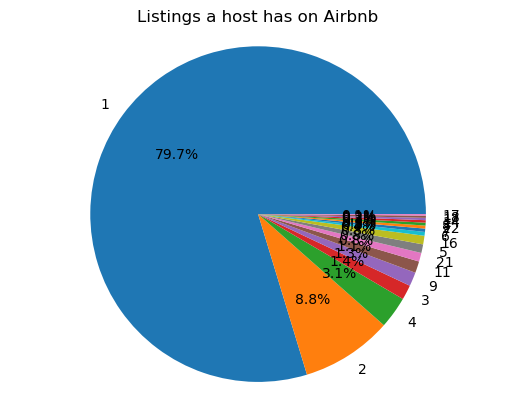

In [96]:
# Visualizing the percentage of listings most host have
labels = df_copy['calculated_host_listings_count'].unique()
sizes = df_copy['calculated_host_listings_count'].value_counts()*100

plt.figure(figsize = (30,30))
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct = '%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Listings a host has on Airbnb')


plt.show()

### We can see here, that majority of the hosts have 1 properties listed on Airbnb, while few have 2 or 4 properties listed.

#  Visualizing the Airbnbs in Amesterdam on the Map

In [99]:
fig = px.scatter_mapbox(df_copy, lat = "latitude", lon = "longitude", hover_name = "neighbourhood", hover_data = ["neighbourhood", "price"],
                        color_discrete_sequence = ["fuchsia"], zoom = 3, height = 300)
fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
fig.show()

# Scatter Plot to show the neighbourhood based on Latitude and Longitude

## We will plot the same latitude and longitude in a scatter plot to have the cluster of the location

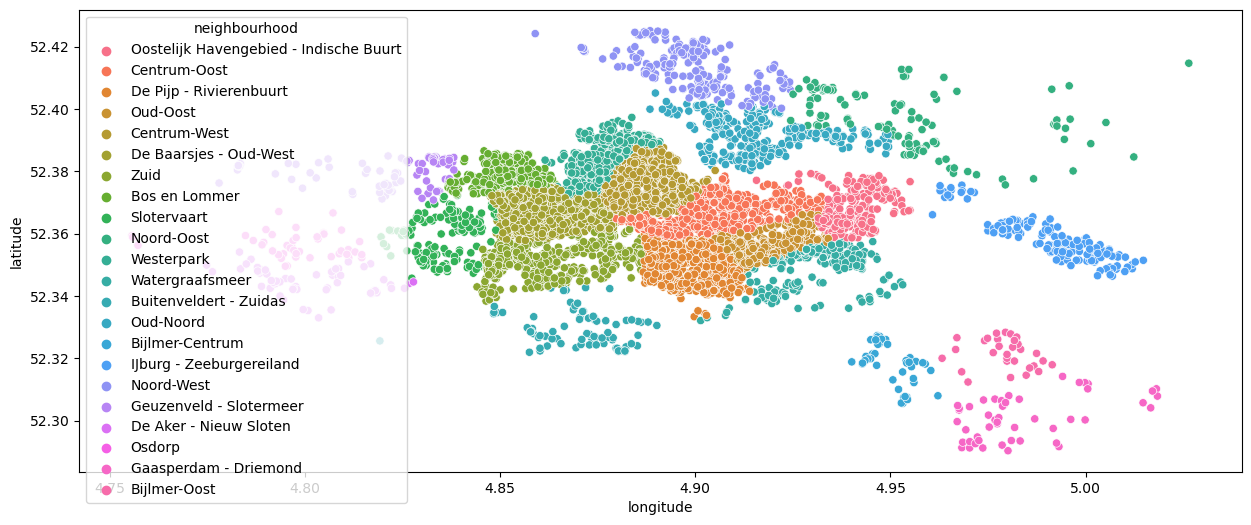

In [5]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df,x='longitude',y='latitude',hue='neighbourhood')
#plt.ioff()
plt.show()

# Average price of the properties based on the neighbourhood

In [118]:
avg_neibour_price_df =df_copy.groupby(['neighbourhood'], as_index=False)['price'].mean().sort_values(['price'], ascending=False).rename(columns={'neighbourhood':'Location','price':'Average Price'})
avg_neibour_price_df

,Location,Average Price
4,Centrum-Oost,308.900000
5,Centrum-West,303.006192
21,Zuid,281.211765
8,De Pijp - Rivierenbuurt,265.912844
16,Oud-Noord,252.130058
7,De Baarsjes - Oud-West,245.950000
6,De Aker - Nieuw Sloten,241.758065
11,IJburg - Zeeburgereiland,241.164634
20,Westerpark,234.792910
19,Watergraafsmeer,234.528139


In [110]:
avg_room_price_df = df_copy.groupby(['room_type'])['price'].mean()
avg_room_price_df

room_type
Entire home/apt    272.403251
Hotel room         240.142857
Private room       182.154693
Shared room        161.674419
Name: price, dtype: float64

<AxesSubplot:xlabel='room_type'>

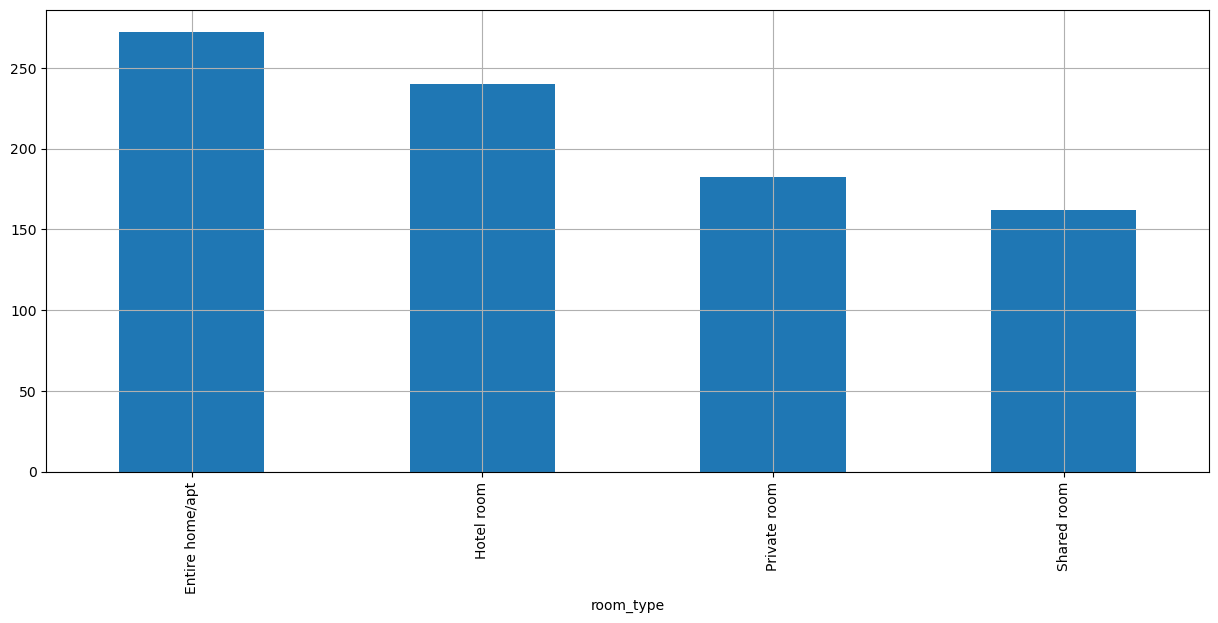

In [112]:
avg_room_price_df.plot.bar(figsize=(15,6),grid=True)

## We can see that the Shared rooms are the cheapest and most affordable in Airbnbs, while renting an entire apartment/home is more expensive. 

# Most Expensive Airbnbs in Centrum-Oost	

In [130]:
# Most expensive Airbnbs in Centrum-Oost
expensive = df_copy[df_copy['neighbourhood'] == 'Centrum-Oost'].sort_values(by = 'price', ascending = False)
expensive.head(10)

,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
4173,93743075,Kelsey,Centrum-Oost,52.363310,4.893070,Private room,12000,1,0,0.00,2,365,0
7013,9913279,Veronika,Centrum-Oost,52.364803,4.879791,Entire home/apt,2083,1,3,1.50,1,61,3
2156,31322341,Rolf,Centrum-Oost,52.362270,4.887320,Entire home/apt,2000,3,40,0.55,1,83,9
1757,1791317,Robert,Centrum-Oost,52.371450,4.901640,Entire home/apt,1790,3,25,0.31,1,326,2
3075,5128876,Alexandra,Centrum-Oost,52.365230,4.900220,Entire home/apt,1600,2,21,0.41,2,74,9
4853,13130024,Martyn,Centrum-Oost,52.367210,4.916550,Entire home/apt,1399,4,3,0.14,1,180,0
6055,222664934,Susan,Centrum-Oost,52.372600,4.903900,Entire home/apt,1278,3,5,0.50,1,317,5
4192,228208519,Eric,Centrum-Oost,52.377540,4.906990,Entire home/apt,1222,1,346,9.59,5,322,146
219,176944339,Dion,Centrum-Oost,52.368660,4.920710,Entire home/apt,1129,2,123,0.97,2,236,10
3021,17942652,Yuta,Centrum-Oost,52.365530,4.886640,Private room,1057,1,4,0.08,2,180,2


In [134]:
no_of_host_per_location =df_copy.groupby('neighbourhood')['host_id'].count().sort_values(ascending=False)
no_of_host_per_location
     

neighbourhood
De Baarsjes - Oud-West                    1260
Centrum-West                               969
De Pijp - Rivierenbuurt                    872
Centrum-Oost                               730
Westerpark                                 536
Zuid                                       510
Oud-Oost                                   451
Bos en Lommer                              382
Oud-Noord                                  346
Oostelijk Havengebied - Indische Buurt     286
Watergraafsmeer                            231
Noord-West                                 198
IJburg - Zeeburgereiland                   164
Slotervaart                                149
Noord-Oost                                 120
Geuzenveld - Slotermeer                     92
Buitenveldert - Zuidas                      81
De Aker - Nieuw Sloten                      62
Gaasperdam - Driemond                       49
Bijlmer-Centrum                             46
Osdorp                                      44

## we can see that the De Baarsjes - Oud-West has the hieghest number of host_id

In [140]:
df_copy[df_copy['price']==0].count()

host_id                           1
host_name                         1
neighbourhood                     1
latitude                          1
longitude                         1
room_type                         1
price                             1
minimum_nights                    1
number_of_reviews                 1
reviews_per_month                 1
calculated_host_listings_count    1
availability_365                  1
number_of_reviews_ltm             1
dtype: int64

## data has values equal zero in price we should delete this values

In [148]:
df_copy.loc[df['price'] < 100,'price'].count()

675

In [149]:
#Find the mean value of price which value is less than 100$
round(df_copy.loc[df['price'] < 100,'price'].mean())

79

In [150]:
df_copy['price'] = np.where(
   (df_copy['price'] <= 50) & (df_copy['minimum_nights'] == 1) ,round(df_copy.loc[df_copy['price'] < 100,'price'].mean()) ,df_copy['price'])

In [151]:
df_copy[df_copy['price']==0].count()

host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

# let us know maximum and minimum price for each location

In [154]:
max_price_df = df_copy.groupby('neighbourhood',as_index=False)['price'].max().sort_values(['price'],ascending = False).rename(columns = {'price':'Maximum price','neighbourhood':'Location'})
max_price_df

,Location,Maximum price
4,Centrum-Oost,12000
5,Centrum-West,10000
16,Oud-Noord,2647
11,IJburg - Zeeburgereiland,2575
7,De Baarsjes - Oud-West,2500
6,De Aker - Nieuw Sloten,2450
21,Zuid,2000
14,Oostelijk Havengebied - Indische Buurt,1643
8,De Pijp - Rivierenbuurt,1250
17,Oud-Oost,1250


In [155]:
min_price_df = df_copy.groupby('neighbourhood',as_index=False)['price'].min().sort_values(['price'],ascending = False).rename(columns = {'price':'Minimum price','neighbourhood':'Location'})
min_price_df

,Location,Minimum price
21,Zuid,63
10,Geuzenveld - Slotermeer,63
3,Buitenveldert - Zuidas,60
16,Oud-Noord,55
12,Noord-Oost,54
17,Oud-Oost,51
8,De Pijp - Rivierenbuurt,50
6,De Aker - Nieuw Sloten,49
2,Bos en Lommer,46
20,Westerpark,45


In [156]:
merge_price_df = pd.merge(max_price_df, min_price_df, on='Location')
merge_price_df

,Location,Maximum price,Minimum price
0,Centrum-Oost,12000,40
1,Centrum-West,10000,18
2,Oud-Noord,2647,55
3,IJburg - Zeeburgereiland,2575,45
4,De Baarsjes - Oud-West,2500,31
5,De Aker - Nieuw Sloten,2450,49
6,Zuid,2000,63
7,Oostelijk Havengebied - Indische Buurt,1643,43
8,De Pijp - Rivierenbuurt,1250,50
9,Oud-Oost,1250,51


# Transformation of maximum and mimimum price

In [157]:
#Create a function for log transformation of maximum price and minimum price
def log_values(values):
  '''This function takes a price value as a input and give it's log values'''
  new_max_price = np.log2(values)

  return new_max_price

In [158]:
merge_price_df_copy=merge_price_df.copy()

In [159]:
merge_price_df_copy['Maximum price'] = merge_price_df_copy.apply(lambda x: log_values(x['Maximum price']), axis=1)
merge_price_df_copy['Minimum price'] = merge_price_df_copy.apply(lambda x: log_values(x['Minimum price']), axis=1)
     

In [160]:
merge_price_df_copy

,Location,Maximum price,Minimum price
0,Centrum-Oost,13.550747,5.321928
1,Centrum-West,13.287712,4.169925
2,Oud-Noord,11.370142,5.781360
3,IJburg - Zeeburgereiland,11.330357,5.491853
4,De Baarsjes - Oud-West,11.287712,4.954196
5,De Aker - Nieuw Sloten,11.258566,5.614710
6,Zuid,10.965784,5.977280
7,Oostelijk Havengebied - Indische Buurt,10.682117,5.426265
8,De Pijp - Rivierenbuurt,10.287712,5.643856
9,Oud-Oost,10.287712,5.672425


In [161]:
# Visulizing maximum and minimum price for each location

Text(0.5, 1.0, 'Maximum and minimum price according to location')

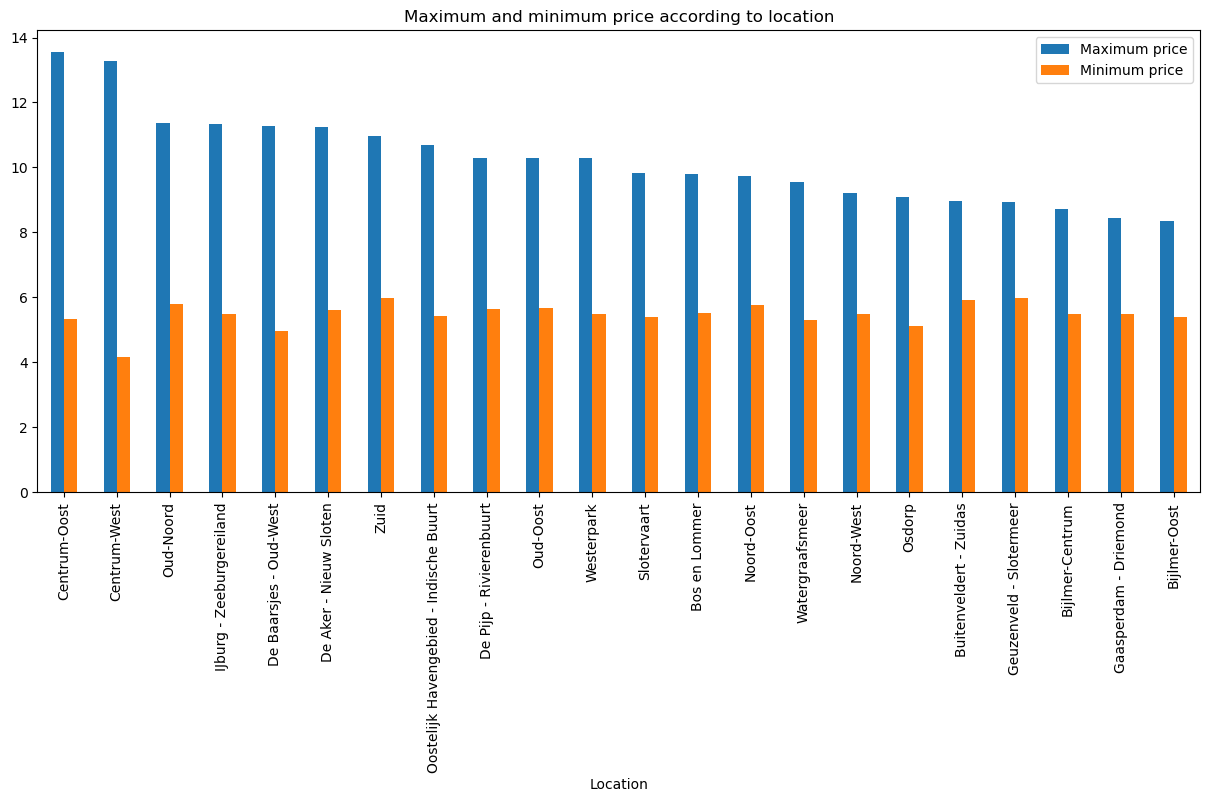

In [162]:
merge_price_df_copy.plot(x="Location", y=['Maximum price','Minimum price'], kind="bar",figsize=(15,6))
plt.legend(labels = ['Maximum price','Minimum price'])
plt.title('Maximum and minimum price according to location')

# The host based on number of reviews

In [164]:

#Get the host based on number of reviews
host_based_on_review_df = df_copy.groupby(['host_id','host_name'],as_index=False)['number_of_reviews'].sum().sort_values(['number_of_reviews'],ascending = False)
host_based_on_review_df

,host_id,host_name,number_of_reviews
6147,407017762,Jean Paul,4463
5755,251479377,Generator,3584
6034,363404652,Conscious Hotel The Tire Station,2365
5722,243087395,CityHub,1934
5657,228208519,Eric,1778
...,...,...,...
1929,12027810,Thijs,0
5490,191856882,Jasper,0
5491,191926301,Myrna,0
1918,11901935,Tomer,0


## 407017762	Jean Paul the host according to numbeer of reviews

# let us know the host based on availability in a year

In [167]:

#Get the host based on availability in a year
host_based_on_availability_df = df_copy.groupby(['host_id','host_name'],as_index=False)['availability_365'].mean().sort_values(['availability_365'],ascending = False)
host_based_on_availability_df

,host_id,host_name,availability_365
2317,16341323,Özgün,365.0
6205,423797988,Joey,365.0
2678,20544193,Laura,365.0
5151,133201526,Anne,365.0
6129,400833385,Floris,365.0
...,...,...,...
4826,94911405,Susanna,0.0
2456,17760324,Laurens,0.0
4828,95158280,Otto,0.0
2455,17749496,Martijn,0.0


## 16341323	Özgün	 is the host according to availability in a year 

In [169]:
#Merge two dataframe based on number of reviews and availability in a year
popular_host_df = pd.merge(host_based_on_review_df,host_based_on_availability_df,on = ['host_id','host_name']).sort_values(['availability_365','number_of_reviews'],ascending = [False,False]).rename(columns = {'number_of_reviews':'Number of reviews','availability_365':'Availability in a year'})

popular_host_df

,host_id,host_name,Number of reviews,Availability in a year
1593,1930105,Roel,41,365.0
3798,423797988,Joey,8,365.0
4054,382681673,Pauline,7,365.0
4384,22605509,Sander,5,365.0
4570,4398501,Martin,5,365.0
...,...,...,...,...
6544,11896685,Izabela,0,0.0
6552,13270278,Maarten,0,0.0
6556,13034277,Theo,0,0.0
6563,12468549,Arno,0,0.0


## 1930105	Roel	 is the host according to number of reviews and availability in year

In [185]:

#Most popular top 5 host in Amesterdam
popular_host_df.head(5)

,host_id,host_name,Number of reviews,Availability in a year
1593,1930105,Roel,41,365.0
3798,423797988,Joey,8,365.0
4054,382681673,Pauline,7,365.0
4384,22605509,Sander,5,365.0
4570,4398501,Martin,5,365.0


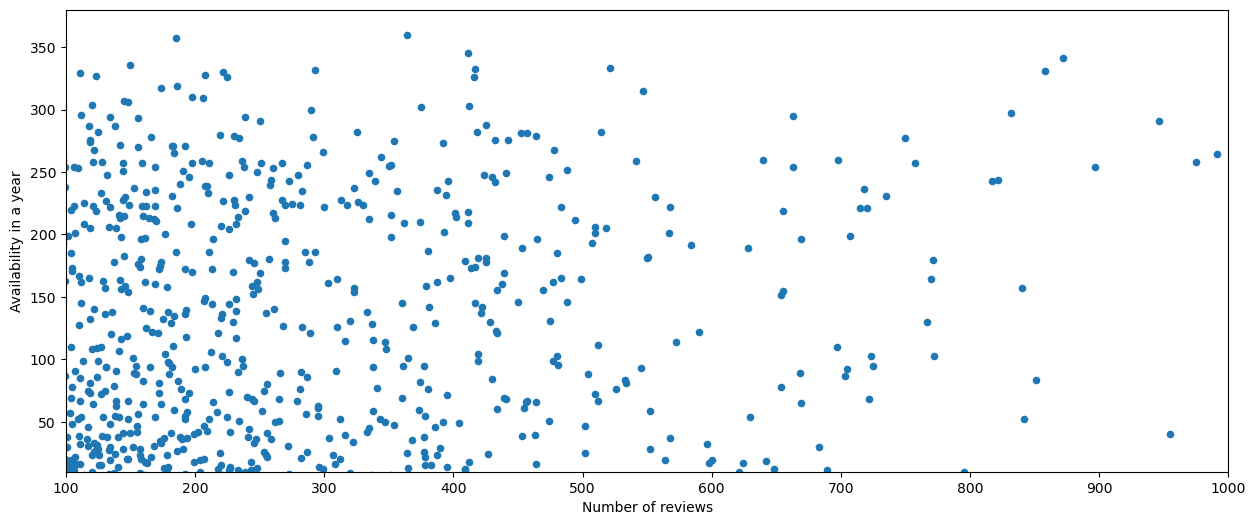

In [186]:
#Create scatter plot based on number of reviews and availability in a year
popular_host_df.plot.scatter(x='Number of reviews', y='Availability in a year', xlim=(100,1000),ylim=(10,380),figsize=(15,6))
plt.show()

     


## there is no relation between the number of reviews and the availability in year

# Availability of Room

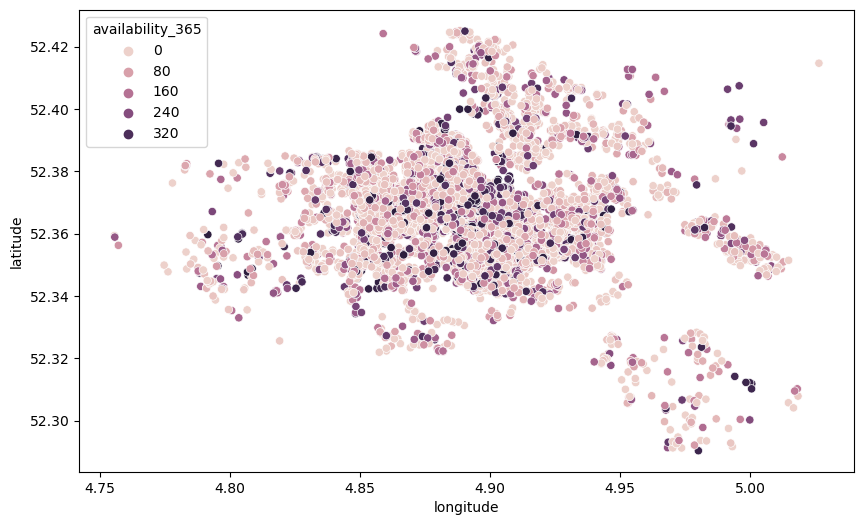

In [187]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_copy,x='longitude',y='latitude',hue='availability_365')
plt.ioff()
plt.show()